In [10]:
from scipy.io import wavfile
import math
from python_speech_features import mfcc
import pickle
import numpy as np

from keras.models import  load_model

import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
fileName = 'dataset\\merge.wav'
fs = 16000
sampleRate, sig = wavfile.read(fileName)


C:\Users\Yuri\Anaconda2\envs\Pyhton36\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [26]:
#shift in seconds
def segmentation(file, samplerate, shift = 0.05, samplelength = 16000, valueIndex = 0):
    mfccFeatures = []
    shift = round(shift*samplerate)
    length = file.shape[0]
    with open('variables/mfccValues.pkl', 'rb') as f:  
        values = pickle.load(f)
    for i in range(0, length-samplelength-1, shift):
        mfcc_feat = mfcc(file[i:i+samplelength-1], sampleRate, numcep = values[valueIndex][0], nfilt = values[valueIndex][1], winlen = values[valueIndex][2], winstep = values[valueIndex][3])
        mfccFeatures.append(mfcc_feat)
    mfccFeatures = np.array(mfccFeatures)
    mfccFeatures = np.reshape(mfccFeatures, ( mfccFeatures.shape[0], mfccFeatures.shape[1], mfccFeatures.shape[2],1))
    return mfccFeatures

In [27]:
mfccFeatures = segmentation(sig, sampleRate)

In [107]:
dest_directory = 'model_backup/'
name = 'cnn.bak'

cnn = load_model(dest_directory + name)

with open('variables/labelList.pkl', 'rb') as f:  
    labelList = pickle.load(f)

<IPython.core.display.Javascript object>


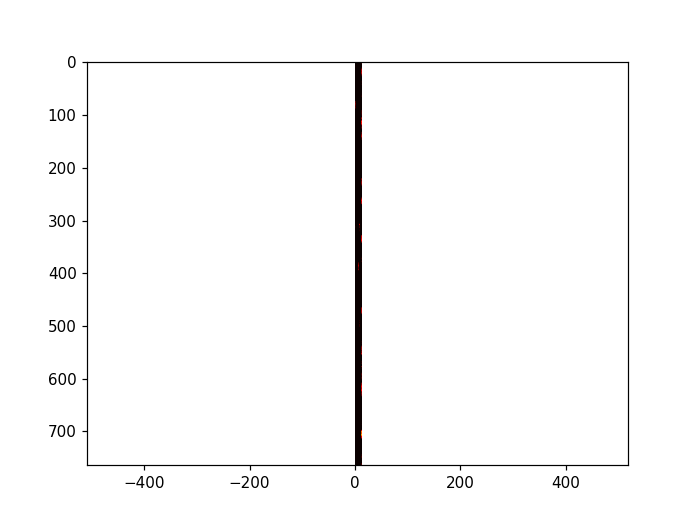

In [108]:
preds = cnn.predict(mfccFeatures)
predsTmp = np.zeros(preds.shape)
for index in range(preds.shape[0]):
    predsTmp[index][np.argmax(preds[index])]=1
plt.figure(1)
plt.axis('equal')
plt.imshow(preds, cmap='hot', interpolation='nearest')
plt.show()

In [70]:
predictions = []
for i in np.argmax(preds, axis = 1):
    predictions.append(i)
predictions = np.array(predictions)

In [117]:
def deNoise(listPred):
    '''
    This function change the outlier prediction between two equal predition
    '''
    predictions = listPred    
    for count, prediction in enumerate(predictions):
        if count<len(predictions)-3-1:
            compute = predictions[count:count+3]
            if compute[0] == compute[2]:
                compute[1] = compute[0]
            predictions[count:count+3]=compute
    return predictions

def isMonoValue(l):
    '''
    return true if l has all the same value
    '''
    a = -1
    value = True
    for i in l:
        if a<0:
            a=i
        elif i != a:
            value = False
    return value

def predict(nnPred, lengthOfPrediction, listLabel):
    '''
    returns a list of predictions with:
    nnPred are the prediction of the nn
    lengthOfPrediction is a parameter to tune the threshold of samples for word prediction
    listLabel is the list with the link between the index and the label
    '''
    predictions = []
    index = 0
    while index < len(nnPred) - lengthOfPrediction -1:
        a = nnPred[index:index+lengthOfPrediction]
        if isMonoValue(a):
            predictions.append(listLabel[int(np.mean(a))])
            index += lengthOfPrediction
        else:
            index += 1            
    return predictions

In [118]:
deNoisePred = deNoise(predictions)
predict(deNoisePred, 11, labelList)

['unknown',
 'unknown',
 'unknown',
 'unknown',
 'down',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'go',
 'unknown',
 'unknown',
 'unknown',
 'left',
 'unknown',
 'go',
 'no',
 'off',
 'unknown',
 'left',
 'unknown',
 'unknown',
 'stop',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'off',
 'unknown',
 'yes']